In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200) # So we can see all columns
pd.set_option('display.max_rows',200)
import utility_functions


In [2]:
df = pd.read_csv("D:/Banque Misr Internship/Loan Datasets/final_dataset.csv")

In [3]:
import importlib
importlib.reload(utility_functions)

<module 'utility_functions' from 'd:\\Banque Misr Internship\\loan-defaulter-prediction\\Final Notebooks\\utility_functions.py'>

Split the data into features and target

In [4]:
# # Split the data into features (X) and target (y)
# x = df.drop('TARGET', axis=1)
# y = df['TARGET']

Split data into train and test

In [5]:
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Impute the minor class

In [6]:
# adasyn = ADASYN(sampling_strategy='minority', random_state=42)
# X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

Further split into training-validation

In [7]:
# X_train_res, X_val, y_train_res, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.3, random_state=42)

Setup the model

In [8]:
X_train_res,X_val,y_train_res,y_val,X_test,y_test = utility_functions.setup_model(df)

Standarize the data

In [9]:
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


Train the model

In [10]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(C=0.1,max_iter=5000, random_state=42)
# Train the model on the resampled training data
logreg.fit(X_train_res_scaled, y_train_res)

# Predict on the validation set
y_pred_logreg = logreg.predict(X_val_scaled)
y_pred_proba_logreg = logreg.predict_proba(X_val_scaled)[:, 1]

Check the metrics

In [11]:
utility_functions.calculate_metrics(y_val,y_pred_logreg)

Accuracy: 0.9535
F1 Score: 0.9515
ROC-AUC Score: 0.9537


Plot Confusion matrix

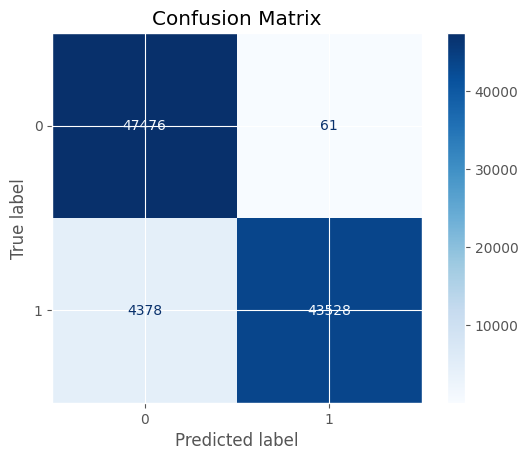

In [12]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred_logreg)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()